# Analysis of Dummy Customer Data with Errors Using Python 

## Import Libraries

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Read Sfake_customer_data_with_errors.csv as a dataframe 

In [2]:
df = pd.read_csv('fake_customer_data_with_errors.csv')
df 

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,CUST1447,Mark Mahmoud,66.0,male,mark.mahmoud@hotmail.com,987654321.0,462.47,2023-08-04,Toys,5.0,NaN,male
2146,CUST1381,Fatma Hassan,NaN,M,fatma.hassan@yahoo.com,NaN,237.62,2024-01-28,Toys,5.0,NaN,M
2147,CUST2338,Ali Gaber,-1.0,M,ali.gaber@gmail.com,NaN,174.72,2024-09-29,Books,NaN,NaN,M
2148,CUST1694,John Ali,200.0,Female,john.ali@yahoo.com,987654321.0,250.47,2024-02-05,NaN,5.0,NaN,Female


# 1- Explore Data 

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M


In [4]:
df.tail() 

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
2145,CUST1447,Mark Mahmoud,66.0,male,mark.mahmoud@hotmail.com,987654321.0,462.47,2023-08-04,Toys,5.0,NaN,male
2146,CUST1381,Fatma Hassan,NaN,M,fatma.hassan@yahoo.com,NaN,237.62,2024-01-28,Toys,5.0,NaN,M
2147,CUST2338,Ali Gaber,-1.0,M,ali.gaber@gmail.com,NaN,174.72,2024-09-29,Books,NaN,NaN,M
2148,CUST1694,John Ali,200.0,Female,john.ali@yahoo.com,987654321.0,250.47,2024-02-05,NaN,5.0,NaN,Female
2149,CUST1567,Ahmed Hassan,NaN,male,ahmed.hassan@yahoo.com,123456789.0,891.41,2023-10-13,Clothing,3.0,NaN,male


In [5]:
df.sample(3)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
1979,CUST2979,Fatma Smith,200.0,M,fatma.smith@gmail.com,987654321.0,565.84,2024-05-18,Books,3.0,NaN,M
1505,CUST2505,Ahmed Mahmoud,-1.0,Male,ahmed.mahmoud@gmail.com,123456789.0,491.69,2023-12-22,NaN,3.0,NaN,Male
439,CUST1439,Alaa Smith,82.0,female,alaa.smith@hotmail.com,NaN,824.07,2024-06-19,Electronics,10.0,NaN,female


In [6]:
df.shape 

(2150, 12)

In [7]:
df.columns   

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Email', 'Phone',
       'PurchaseAmount', 'PurchaseDate', 'ProductCategory', 'Rating',
       'Unnamed', '  Gender  '],
      dtype='object')

In [8]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [9]:
df.duplicated().sum() 

np.int64(50)

In [10]:
df.nunique() 

CustomerID         2100
Name                 48
Age                  78
Gender                6
Email               144
Phone                 2
PurchaseAmount     1991
PurchaseDate        860
ProductCategory       5
Rating                6
Unnamed               0
  Gender              6
dtype: int64

In [11]:
df.isnull().sum()   

CustomerID            0
Name                  0
Age                 520
Gender              273
Email                 0
Phone              1078
PurchaseAmount      101
PurchaseDate          0
ProductCategory     577
Rating              329
Unnamed            2150
  Gender            273
dtype: int64

In [12]:
df.describe() 

,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


# 2- Clean Data 

In [13]:
df = df.drop(columns= ['Unnamed', 'Gender']) 

In [14]:
df.head(3)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0


In [15]:
df['Add'] = 1  

In [16]:
df.sample(4)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
247,CUST1247,John Mahmoud,26.0,male,john.mahmoud@yahoo.com,NaN,NaN,2025-05-21,Toys,1.0,1
1729,CUST2729,Lina Hassan,NaN,NaN,lina.hassan@gmail.com,987654321.0,69.76,32/13/2020,Books,NaN,1
1733,CUST2733,Lina Hassan,NaN,NaN,lina.hassan@yahoo.com,123456789.0,596.96,2024-03-25,Home,2.0,1
1650,CUST2650,Lina Ali,46.0,male,lina.ali@hotmail.com,987654321.0,357.30,2023-06-01,Books,2.0,1


In [17]:
df.drop_duplicates(inplace=True) 

In [18]:
df.shape

(2100, 11)

In [19]:
df['Gender'].unique()

array([nan, 'Female', 'male', 'F', 'M', 'female', 'Male'], dtype=object)

In [20]:
df['Gender']=df['Gender'].str.lower() 

In [21]:
df['Gender'].unique()

array([nan, 'female', 'male', 'f', 'm'], dtype=object)

In [22]:
df['Gender'].replace({'m': 'male', 'f':'female'}, inplace = True)  

/var/folders/63/flncqyd520177jnss7_rz6280000gn/T/ipykernel_1455/1157148229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'m': 'male', 'f':'female'}, inplace = True) # ابدل القيم


In [23]:
df['Gender'].unique()

array([nan, 'female', 'male'], dtype=object)

In [24]:
df['Gender'].fillna('male', inplace = True ) 

In [25]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [26]:
df['Age'].fillna( df['Age'].mean(), inplace = True ) 

/var/folders/63/flncqyd520177jnss7_rz6280000gn/T/ipykernel_1455/3855543326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna( df['Age'].mean(), inplace = True ) ## استبدل القيم المفقودة بلمتوسط


In [27]:
df['Age']= df['Age'].apply(lambda x:df['Age'].mean() if x<0 else x) 

In [28]:
df['ProductCategory'].fillna( 'UnKnown', inplace = True )

/var/folders/63/flncqyd520177jnss7_rz6280000gn/T/ipykernel_1455/2314548606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ProductCategory'].fillna( 'UnKnown', inplace = True )


In [29]:
df.isnull().sum()

CustomerID            0
Name                  0
Age                   0
Gender                0
Email                 0
Phone              1057
PurchaseAmount       97
PurchaseDate          0
ProductCategory       0
Rating              322
Add                   0
dtype: int64

In [30]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'] , errors = 'coerce')

# 3- Data Analysis 

In [31]:
df.sort_values(by=['PurchaseAmount'],ascending= False).head(10)  

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
687,CUST1687,Alaa Ibrahim,200.000000,female,alaa.ibrahim@yahoo.com,123456789.0,999.56,2025-05-16,Electronics,1.0,1
1949,CUST2949,Fatma Mahmoud,63.000000,female,fatma.mahmoud@yahoo.com,NaN,999.30,2024-04-10,Clothing,3.0,1
424,CUST1424,John Ali,80.000000,male,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0,1
1832,CUST2832,John Ali,49.000000,male,john.ali@yahoo.com,NaN,999.00,2024-10-10,Toys,1.0,1
1961,CUST2961,Mark Mahmoud,85.044542,male,mark.mahmoud@yahoo.com,NaN,998.59,2025-04-25,Electronics,2.0,1
631,CUST1631,Lina Mahmoud,18.000000,female,lina.mahmoud@gmail.com,NaN,998.16,2023-10-09,Books,5.0,1
386,CUST1386,Fatma Ali,200.000000,female,fatma.ali@hotmail.com,123456789.0,995.55,2022-11-12,Clothing,4.0,1
335,CUST1335,Alaa Mahmoud,85.044542,female,alaa.mahmoud@yahoo.com,123456789.0,995.41,2024-02-11,Toys,3.0,1
908,CUST1908,Sara Ali,85.044542,female,sara.ali@yahoo.com,NaN,995.32,2023-09-04,Clothing,1.0,1
1708,CUST2708,Sara Hassan,85.044542,female,sara.hassan@yahoo.com,NaN,995.25,2023-05-17,Electronics,NaN,1


In [32]:
df['ProductCategory'].value_counts() 

ProductCategory
UnKnown        565
Clothing       323
Electronics    323
Books          305
Home           296
Toys           288
Name: count, dtype: int64

ERROR! Session/line number was not unique in database. History logging moved to new session 3


In [33]:
df['Rating'].value_counts().sort_index() 

Rating
1.0     266
2.0     310
3.0     326
4.0     278
5.0     307
10.0    291
Name: count, dtype: int64

In [34]:
gender_counts= df['Gender'].value_counts()

Gender
male      1209
female     891
Name: count, dtype: int64

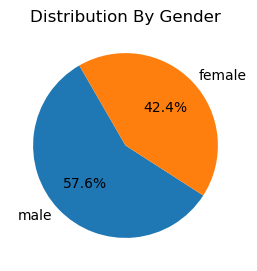

In [41]:
plt.figure(figsize=(3,3))
plt.pie(gender_counts,labels=gender_counts.index , autopct='%1.1f%%', startangle =120)
plt.title('Distribution By Gender')
plt.show()

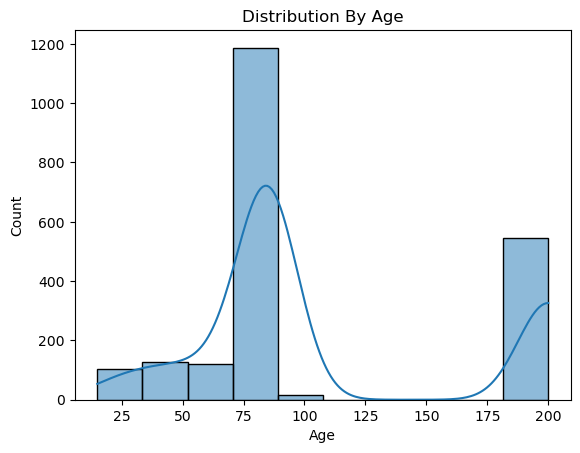

In [46]:
sns.histplot(df['Age'], bins=10, kde=True )
plt.title('Distribution By Age')
plt.show()

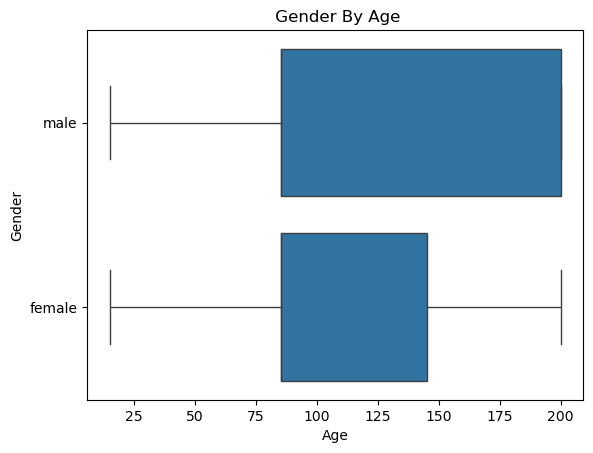

In [49]:
sns.boxplot(data=df, x= 'Age', y='Gender')
plt.title(' Gender By Age')
plt.show()


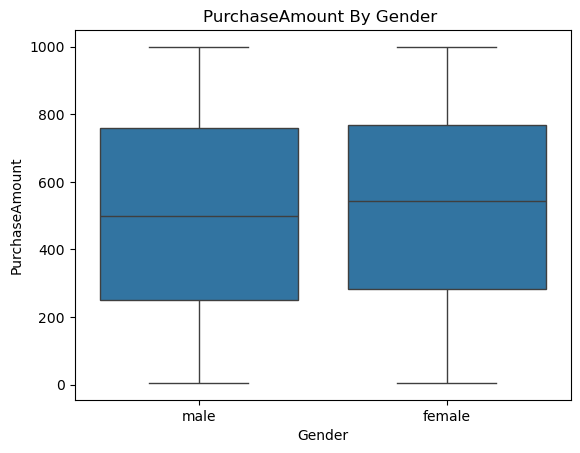

In [52]:

sns.boxplot(data=df, x= 'Gender', y='PurchaseAmount')
plt.title('PurchaseAmount By Gender ')
plt.show()


In [56]:
corr=df[['Age','Rating','PurchaseAmount']].corr() 


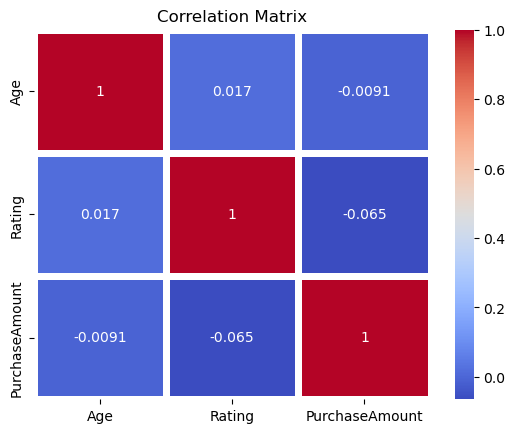

In [59]:
sns.heatmap(corr,annot=True , linewidths = 5 , cmap='coolwarm' )

plt.title('Correlation Matrix')
plt.show()

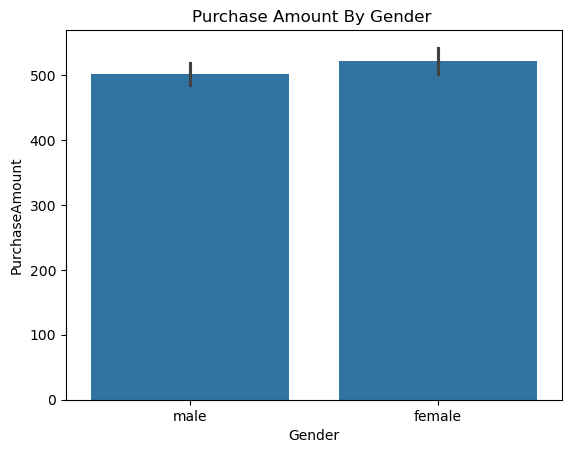

In [60]:
sns.barplot(data=df, x= 'Gender', y='PurchaseAmount', estimator= 'mean')
plt.title('Purchase Amount By Gender ')
plt.show()
##هنا متوسط 


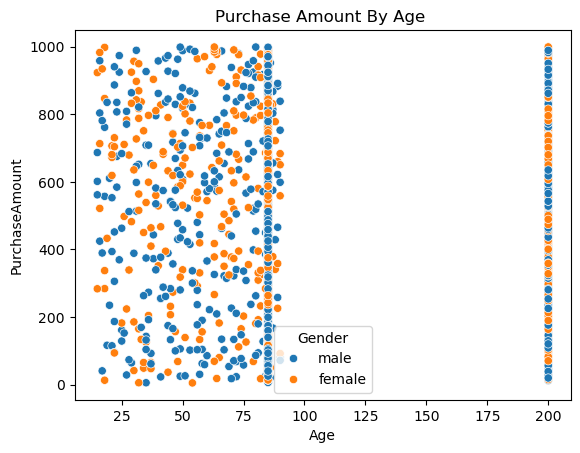

In [63]:
sns.scatterplot(data=df, x= 'Age', y='PurchaseAmount', hue= 'Gender')
plt.title('Purchase Amount By Age ')
plt.show()

In [67]:
df['PurchaseDate']= pd.to_datetime(df['PurchaseDate'])

In [72]:
df['Month']=df['PurchaseDate'].dt.month


In [73]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add,Month
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1,10.0
1,CUST1001,Fatma Ali,85.044542,female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,UnKnown,3.0,1,2.0
2,CUST1002,Ahmed Mahmoud,85.044542,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,1,7.0
3,CUST1003,Ahmed Gaber,85.044542,female,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,UnKnown,2.0,1,12.0
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1,12.0


In [76]:
monthly_sales=df.groupby('Month')['PurchaseAmount'].sum() 

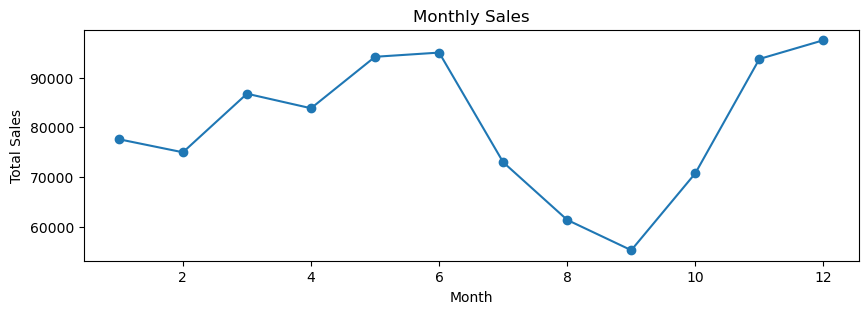

In [81]:
monthly_sales.plot(figsize=(10,3), kind='line', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [83]:
df.to_csv('Clean_Data_2025', index=False) 